### Handling Outliers


#### 01.Import Dependencies

In [11]:
import os
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#### 02.Basic Processing

In [ ]:
df = pd.read_csv("../Week 01/Data/processed/churnModelling_missing_values_handled.csv")
df.head(5)

,Unnamed: 0,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,619,France,Female,42.00,2,0.00,1,1,1,101348.88,1
1,1,608,Spain,Female,41.00,1,83807.86,1,0,1,112542.58,0
2,2,502,France,Female,42.00,8,159660.80,3,1,0,113931.57,1
3,3,699,France,Female,38.91,1,0.00,2,0,0,93826.63,0
4,4,850,Spain,Female,43.00,2,125510.82,1,1,1,79084.10,0


In [3]:
print(f'No of rows : {len(df)}')

No of rows : 10000


>Categorical Variables have 2 types:
Nominal Columns are categories without inherent order. We use One Hot Encoding for these variables.
Ordinal Columns are categories with inherent order. We use Label Encoding for these variables.

>In this dataset, there are 2 Categorical Variables - Geography and Gender. Both are Nominal variables.

##### For Numerical Variables We Plot Histogram To Check The Distribusion

#### 3. Outlier Detection Techniques

##### 3.1 distribution plots

In [15]:
categorical_variables = [
    'Geography',
    'Gender',
    'HasCrCard',
    'IsActiveMember',
    'Exited'
]

numerical_columns = [
    'Age',
    'Tenure',
    'Balance',	
    'EstimatedSalary',
    'CreditScore',
    'NumOfProducts'
]

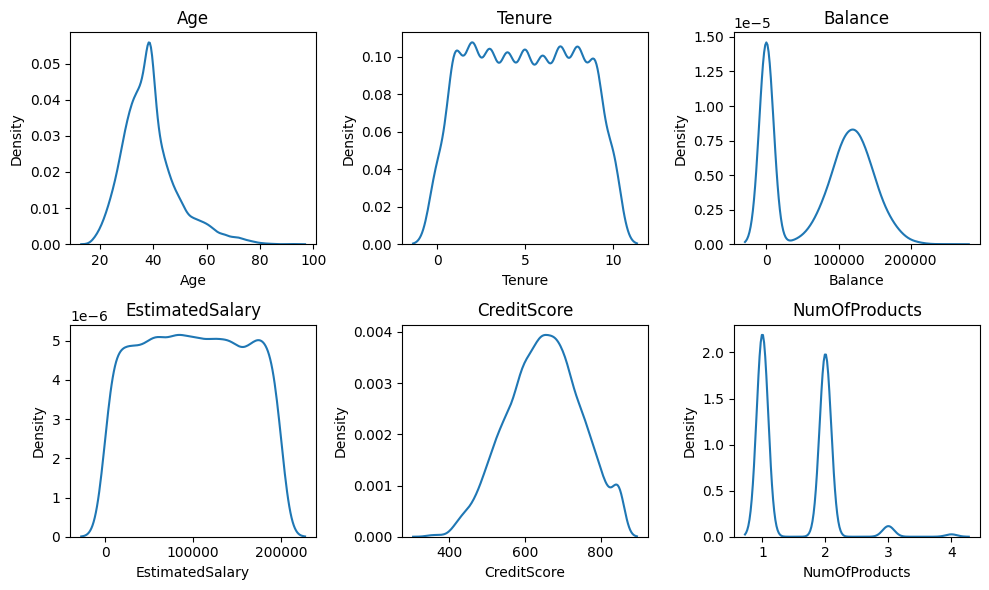

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()

for idx, col in enumerate(numerical_columns):
    sns.kdeplot(data=df, x=col, ax=axes[idx])
    axes[idx].set_title(col)

plt.tight_layout()
plt.show()


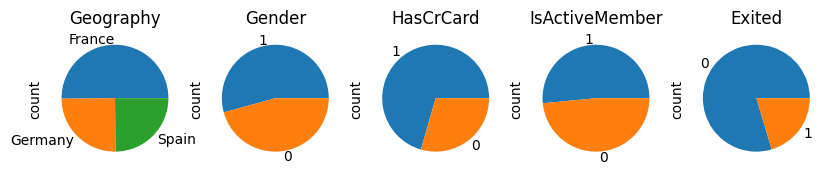

In [16]:
fig, axes = plt.subplots(1, 5, figsize=(10, 6))

for idx, col in enumerate(categorical_variables):
    df[col].value_counts().plot(kind="pie",ax=axes[idx])
    axes[idx].set_title(col)

plt.show()



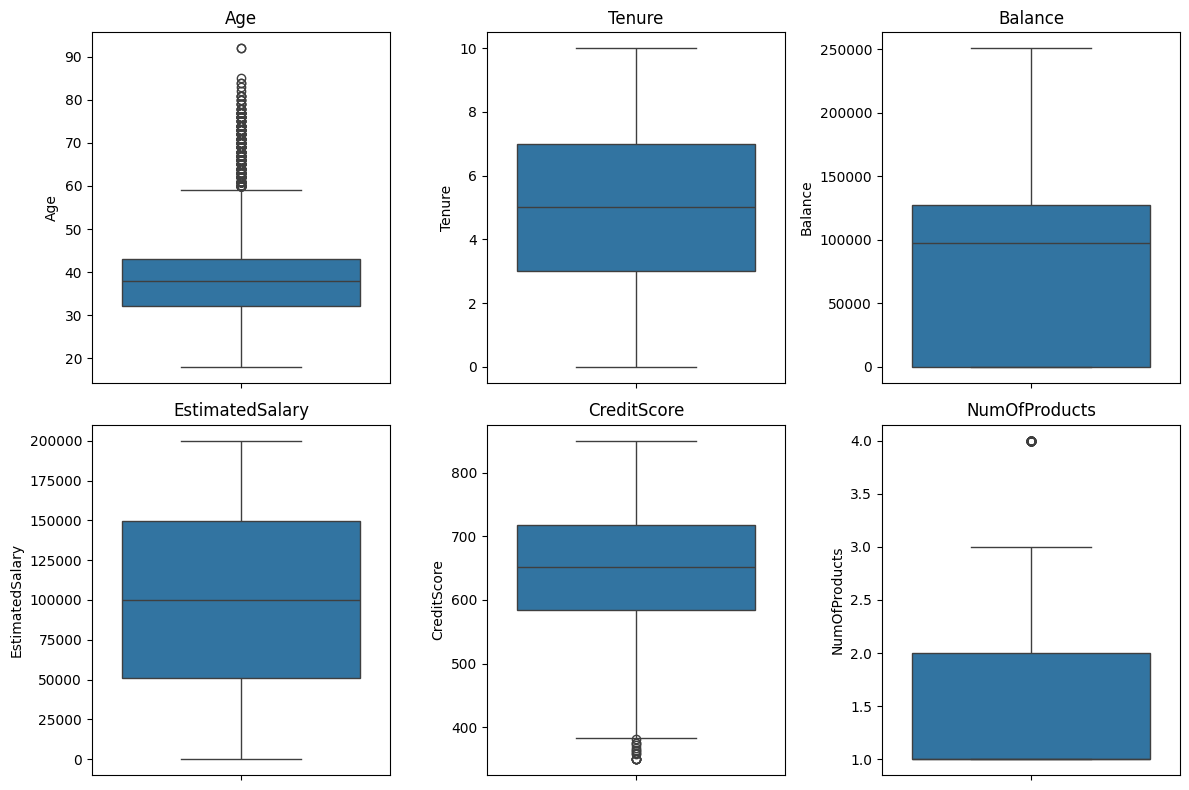

In [17]:
numerical_columns = [
    'Age',
    'Tenure',
    'Balance',	
    'EstimatedSalary',
    'CreditScore',
    'NumOfProducts'
]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()  

for idx, col in enumerate(numerical_columns):
    sns.boxplot(data=df, y=col, ax=axes[idx])
    axes[idx].set_title(col)

plt.tight_layout()
plt.show()

##### 3.3 Empirical Rule

In [18]:
def find_anomaly(data):
    mean = data.mean()
    std = data.std()

    upper_bound = mean + (3 * std)
    lower_bound = mean - (3 * std)

    return (data > upper_bound) | (data < lower_bound)

In [22]:
numerical_columns = [
    'Age',
    'Tenure',
    'Balance',	
    'EstimatedSalary',
    'CreditScore',
]

for col in numerical_columns:
    n_outliers = find_anomaly(df[col]).sum()
    outlier_percentage = round(n_outliers/len(df),3)
    print(f"{col} : {n_outliers} outliers ({outlier_percentage}%)")

Age : 144 outliers (0.014%)
Tenure : 0 outliers (0.0%)
Balance : 0 outliers (0.0%)
EstimatedSalary : 0 outliers (0.0%)
CreditScore : 8 outliers (0.001%)


##### 3.4 IQR Method

In [23]:
def find_anomaly(data):
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)

    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    return (data > upper_bound) | (data < lower_bound)

In [24]:
numerical_columns = [
    'Age',
    'Tenure',
    'Balance',	
    'EstimatedSalary',
    'CreditScore',
]

for col in numerical_columns:
    n_outliers = find_anomaly(df[col]).sum()
    outlier_percentage = round(n_outliers/len(df),3)
    print(f"{col} : {n_outliers} outliers ({outlier_percentage}%)")

Age : 501 outliers (0.05%)
Tenure : 0 outliers (0.0%)
Balance : 0 outliers (0.0%)
EstimatedSalary : 0 outliers (0.0%)
CreditScore : 15 outliers (0.002%)


In [28]:
outlier_mask_log = pd.DataFrame()
for col in numerical_columns:
    outlier_mask_log[col] = find_anomaly(df[col])

outlier_count = outlier_mask_log.sum(axis=1)
outlier_mask_log['outlier_count'] = outlier_count
outlier_mask_log = outlier_mask_log[outlier_mask_log['outlier_count']==2]
outlier_mask_log

,Age,Tenure,Balance,EstimatedSalary,CreditScore,outlier_count
8762,True,False,False,False,True,2


In [26]:
df.to_csv("../Week 01/Data/processed/churnModelling_outliers_handled.csv",index=False)